# Ecommerce - Linear Regression Project

**I am going to be exploring the Ecommerce dataset from Kaggle, as well as developing a predictive model using linear regression.**

**The scenario is that an Ecommerce company based in New York sells clothing online, and they wish to know whether they should focus their efforts on further developing their mobile app, or their website.** 

**We will use Linear Regression in order to (hopefully) conclude which sector has more of an impact on final sales, or whether or not some other factor has more of an impact.**

**I will divide this project into sections, so that anyone looking for a particular part of this project can have an easier time locating it.**

1. Imports and Data Wrangling
2. Exploratory Data Analysis/Visualizations
3. Model Training/Testing
4. Conclusions

# 1. Imports and Data Wrangling

In [1]:
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Here I will retrieve the data. We note that the data has the following qualitative features:**
* Email
* Address
* Color Avatar

**The quantitative features are as follows:**
* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member.




In [8]:
customers = pd.read_csv('Ecommerce Customers')

In [9]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


**Note that we should omit the customers' email addresses as well as their physical addresses, as these features will most likely not have any correlation with yearly amount spent (our dependent variable).** 

In [10]:
customers = customers.drop(['Email','Address'], axis=1)

In [11]:
customers.head()

,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


**I will also omit their color avatar, as dummifying this variable might be troublesome if there are too many distinct values given.** 

In [12]:
customers['Avatar'].nunique()

138

In [13]:
customers = customers.drop(['Avatar'], axis=1)

In [14]:
customers.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


**Let's take a look at some basic descriptive statistics in order to get an idea of what we are working with**

In [15]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


**As we can see, all of our numerical data is similarly distributed with a standard deviation of 1. This is very convenient for the purposes of our analysis**

**Let's check to see if our data has any missing values**

In [19]:
customers['Avg. Session Length'].isna().sum()

0

In [20]:
customers['Time on App'].isna().sum()

0

In [26]:
customers['Time on Website'].isna().sum()

0

In [25]:
customers['Length of Membership'].isna().sum()

0

In [24]:
customers['Yearly Amount Spent'].isna().sum()

0

# 2. Exploratory Data Analysis/Visualizations
**We are ready to begin our EDA. I will begin with some visualizations using seaborn
The first visualization I like to perform is a scatterplot between each feature and the dependent variable. This is good to see if there is any noticeable correlation.**

### Scatterplot between Avg. Session Length vs Yearly Amount Spent

Pearson r: 0.3550882947076433
p-value: 2.6450940333346556e-16


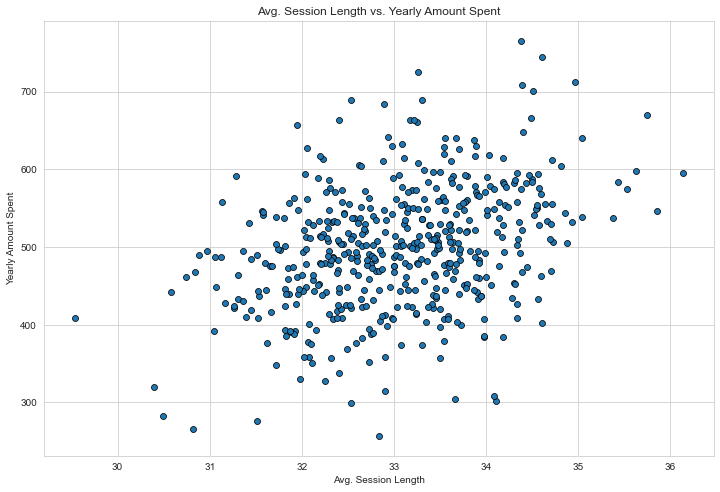

In [47]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
sns.scatterplot(x='Avg. Session Length', y='Yearly Amount Spent', data=customers, edgecolor='black')
plt.title('Avg. Session Length vs. Yearly Amount Spent')

R = stats.pearsonr(customers['Avg. Session Length'],customers['Yearly Amount Spent'])[0]
p = stats.pearsonr(customers['Avg. Session Length'],customers['Yearly Amount Spent'])[1]
print('Pearson r: {0}'.format(R))
print('p-value: {0}'.format(p))

**We can see visually that there is indeed a slight correlation. Statistically, we can interpret the correlation coefficient as: there is a weak, positive correlation between Avg. Session Length and Yearly Amount Spent. Our p-value of less than .01 means we are 99% confident that our calculated correlation is statistically significant.**

### Scatterplot between Time on App vs. Yearly Amount Spent

Pearson r: 0.4993277700534504
p-value: 6.905842369971329e-33


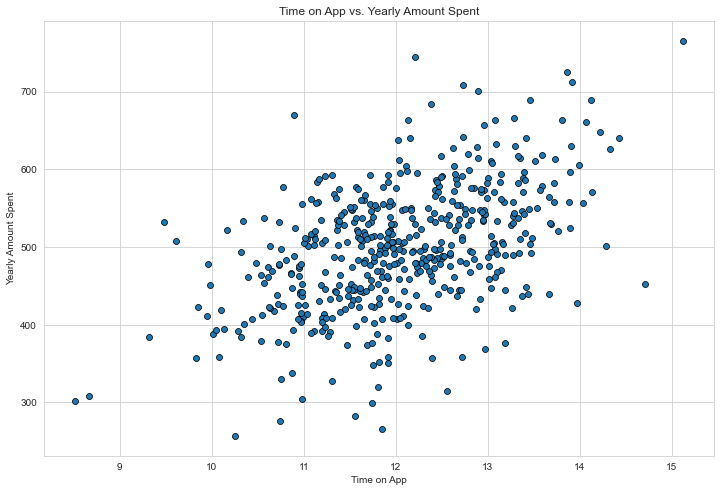

In [46]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
sns.scatterplot(x='Time on App', y='Yearly Amount Spent', data=customers, edgecolor='black')
plt.title('Time on App vs. Yearly Amount Spent')

R = stats.pearsonr(customers['Time on App'],customers['Yearly Amount Spent'])[0]
p = stats.pearsonr(customers['Time on App'],customers['Yearly Amount Spent'])[1]
print('Pearson r: {0}'.format(R))
print('p-value: {0}'.format(p))

**Again we see another correlation between the two variables. In this case, we have a statistically significant correlation of 0.50.**

### Scatterplot between Time on Website vs. Yearly Amount Spent

Pearson r: -0.0026408446721589676
p-value: 0.9530290603515617


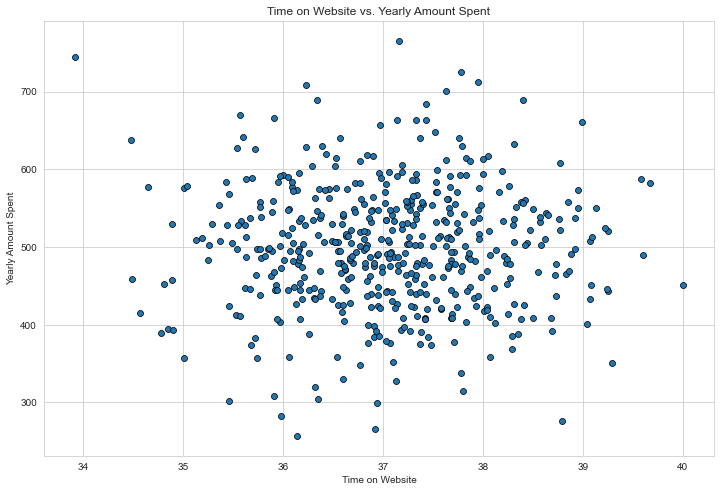

In [49]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
sns.scatterplot(x='Time on Website', y='Yearly Amount Spent', data=customers, edgecolor='black')
plt.title('Time on Website vs. Yearly Amount Spent')

R = stats.pearsonr(customers['Time on Website'],customers['Yearly Amount Spent'])[0]
p = stats.pearsonr(customers['Time on Website'],customers['Yearly Amount Spent'])[1]
print('Pearson r: {0}'.format(R))
print('p-value: {0}'.format(p))

**This is interesting because we can see visually that there is almost no correlation between Time on Website and Yearly Amount Spent. Statistically, our correlation is -0.002, or almost 0, but our p-value indicates that this result is not significant. My initial conclusion here is that there is no association between Time on Website and Yearly Amount Spent.**

### Scatterplot between Length of Membership and Yearly Amount Spent

Pearson r: 0.8090835682475811
p-value: 4.806615782582733e-117


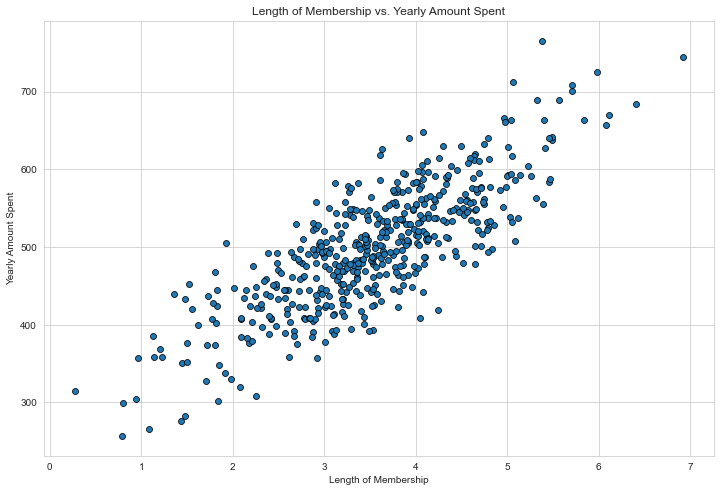

In [48]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
sns.scatterplot(x='Length of Membership', y='Yearly Amount Spent', data=customers, edgecolor='black')
plt.title('Length of Membership vs. Yearly Amount Spent')

R = stats.pearsonr(customers['Length of Membership'],customers['Yearly Amount Spent'])[0]
p = stats.pearsonr(customers['Length of Membership'],customers['Yearly Amount Spent'])[1]
print('Pearson r: {0}'.format(R))
print('p-value: {0}'.format(p))

**We see here that there is a strong correlation between length of membership and yearly amount spent. This makes sense, since we would expect someone that has been a member of the site for a long time is more likely to continue spending money.**
**Statistically, we see that there is a correlation of 0.90, an almost perfect positive correlation, and our p-value of less than 0.01 tells us we are 99% of the siginificance**
**My initial thoughts now are that maybe the Ecommerce store has their thought process wrong altogether, and that instead of focusing on improving their website/app development, they might instead consider making an effort to reach out to their longer tenured customers, perhaps with some sort of promotion.**

**Now that we have seen scatteplots between all the dependent variables one final visualization I like to perform is a jointplot which will show scatterplots between all the dependent variables. This is because we need to check for any possible issues of collinearity, or correlation between the dependent variables.**

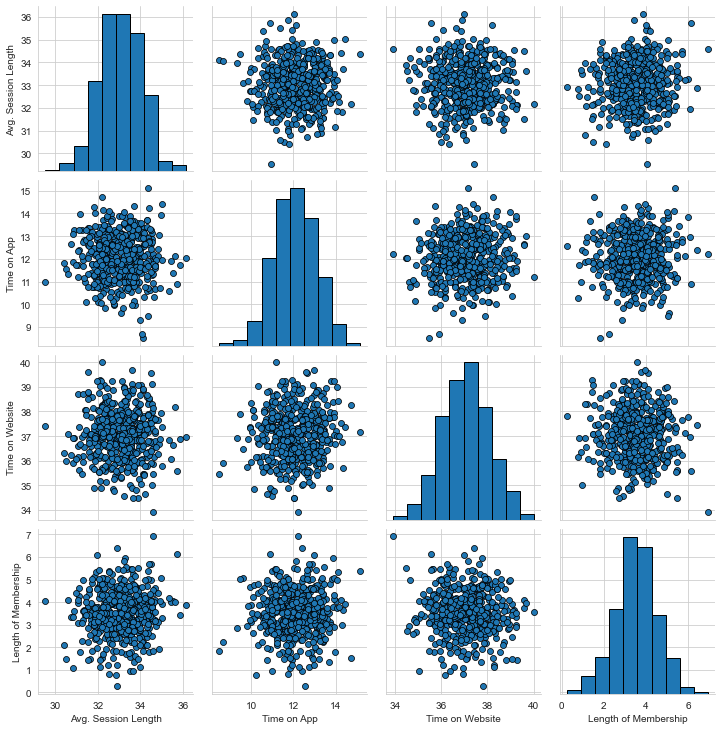

In [53]:
sns.pairplot(data=customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']], 
             plot_kws={'edgecolor':'black'},
             diag_kws={'edgecolor':'black'})

**This looks good. Our dependent variables are showing no obvious signs of collinearity, and we are ready to proceed with training our linear regression model**

# 3. Model Training/Testing
**I will now train and test a Linear Regression model using two frameworks. I will first use sklearn, followed by statsmodels**

## 3.1 Linear Regression using sklearn

**I first need to seperate my model's dependent and independent variables into different series. This will allow me to further split the data set into the training/testing sets.**

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent']

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**Now I will create an instance of the LinearRegression object from sklearn, and fit the model's parameters using my training dataset**

In [98]:
from sklearn.linear_model import LinearRegression

In [99]:
lm = LinearRegression()

In [100]:
lm.fit(X_train, y_train)

LinearRegression()

**Now that the model has been fit using the training data set, we can use our testing dataset into order to test the predictive power of our model**

In [112]:
predictions = lm.predict(X_test)

**Since sklearn does not have the capability of computing adjusted-r-squared, I will calculate it myself, along with the r-squared value**

In [102]:
SS_Residual = np.sum((y_test-predictions)**2)       
SS_Total = np.sum((y_test-np.mean(y_test))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

**The values for r-squared and adjusted r-squared are listed below**

In [103]:
print('r_squared:\t{0} \nadjusted_r_squared:\t{1}'.format(r_squared, adjusted_r_squared))

r_squared:	0.9890046246741234 
adjusted_r_squared:	0.9887013039754785


**As we can see, we have a nearly perfect adjusted r-squared value of 0.989, indicating that our model fits over 99% of the data. Unfortunately, sklearn cannot compute the p-value of our model, so we have no way of verifying whether our results are statistically significant.**

**This shortcoming is what leads me to personally find the statsmodels api to be slightly more useful when building linear/logistic regression models, which I will now demonstrate**

## 3.2 Linear Regression using StatsModels

**I will now perform the same train/test split that I performed for the method using sklearn**

In [108]:
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**I will now build and fit the model using my training data**

In [109]:
import statsmodels.api as sm
model = sm.OLS(y_train,X_train)
result = model.fit()

**The beauty of statsmodels is that with a very simple call of the summary method, we can get a very well organized and informative table of our results**

In [110]:
print(result.summary())

                                 OLS Regression Results                                 
Dep. Variable:     Yearly Amount Spent   R-squared (uncentered):                   0.998
Model:                             OLS   Adj. R-squared (uncentered):              0.998
Method:                  Least Squares   F-statistic:                          4.183e+04
Date:                 Fri, 23 Oct 2020   Prob (F-statistic):                        0.00
Time:                         18:49:28   Log-Likelihood:                         -1592.8
No. Observations:                  350   AIC:                                      3194.
Df Residuals:                      346   BIC:                                      3209.
Df Model:                            4                                                  
Covariance Type:             nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------

**From our results table, we can see that the p-value of the F-statistic is less than 0.001, indicating that we can conclude that our model fits the data significantly well. Thus, we are confident in any predictions that we choose to make from our model.**

# 4. Conclusions

**We can use either model to pull the coefficients of the linear regression model we have developed. For my conclusions I will be using the coefficients generated by the StatsModel api.**

**The coefficients of the model were as follows:**
* Avg. Session Length: 12.9833
* Time on App: 33.9165
* Time on Website: -14.8027
* Length of Membership: 59.5847

**Using these coefficients, we see that Length of Membership has the strongest positive effect on our model: A 1 unit change in Length of Membership results in a 59.5847 unit change in Amount Spent.** 

**However, since the original question was whether to spend more resources on either the Website or Mobile App, we see that since Time on App has a stronger positive effect on our model compared to Time on Website, with a value of 33.9165, we conclude that this should be the primary focus of further development.**